In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings

In [12]:
data = pd.read_csv('Data/Raw Data/Support_tickets.csv')
data.head()

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,...,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,1000000000,Wed,3,100015,Small,1,media,7,Basic,1,...,6,0,0,0,0,neutral,2,227,low,1
1,1000000001,Sat,6,100023,Small,1,healthcare,5,Basic,1,...,2,0,0,0,0,neutral,2,461,low,1
2,1000000002,Mon,1,100012,Small,1,gaming,4,Basic,1,...,0,0,0,0,1,positive,3,306,low,1
3,1000000003,Wed,3,100003,Small,1,media,7,Plus,2,...,16,0,0,0,1,neutral,2,363,medium,2
4,1000000004,Mon,1,100019,Small,1,ecommerce,2,Plus,2,...,6,0,0,0,0,neutral,2,442,low,1


In [13]:
data.columns

Index(['ticket_id', 'day_of_week', 'day_of_week_num', 'company_id',
       'company_size', 'company_size_cat', 'industry', 'industry_cat',
       'customer_tier', 'customer_tier_cat', 'org_users', 'region',
       'region_cat', 'past_30d_tickets', 'past_90d_incidents', 'product_area',
       'product_area_cat', 'booking_channel', 'booking_channel_cat',
       'reported_by_role', 'reported_by_role_cat', 'customers_affected',
       'error_rate_pct', 'downtime_min', 'payment_impact_flag',
       'security_incident_flag', 'data_loss_flag', 'has_runbook',
       'customer_sentiment', 'customer_sentiment_cat', 'description_length',
       'priority', 'priority_cat'],
      dtype='object')

In [15]:
numeric_cols = ['past_30d_tickets', 'past_90d_incidents', 'customers_affected', 'error_rate_pct', 'downtime_min',]
cat_cols = ['company_size_cat','industry_cat', 'customer_tier_cat', 'product_area_cat', 'payment_impact_flag', 
'security_incident_flag', 'data_loss_flag', 'priority_cat']
target_col = 'priority_cat'
index_col = 'ticket_id'

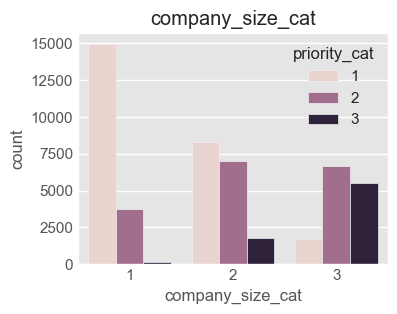

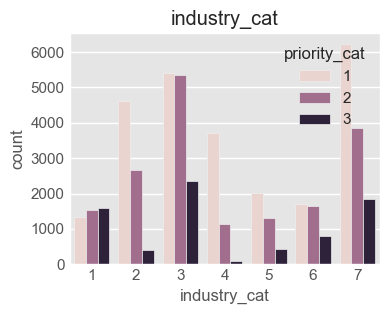

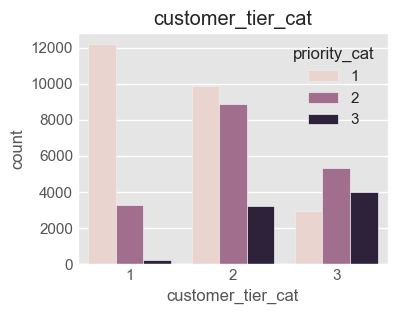

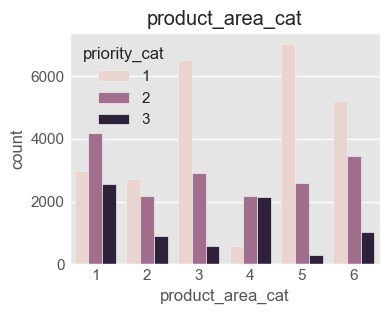

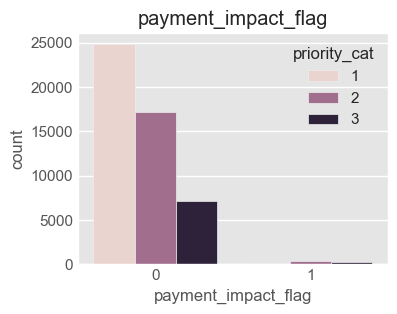

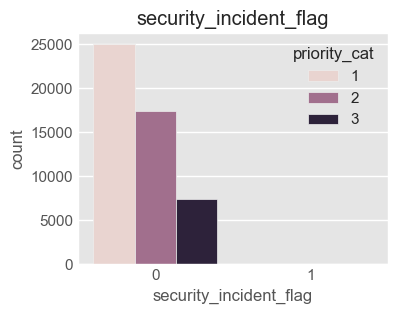

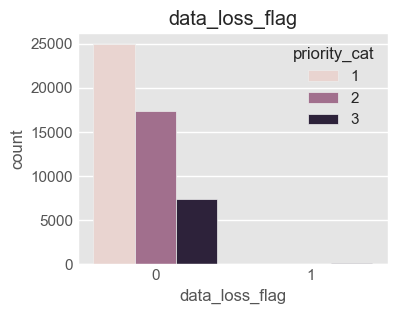

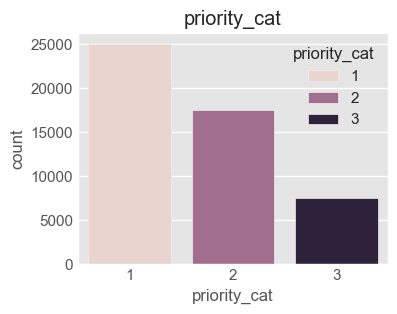

In [30]:
for i in cat_cols:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = i, data = data.loc[:, cat_cols], hue = 'priority_cat')
    plt.title(i)


In [17]:
data.loc[:, numeric_cols].corr()

,past_30d_tickets,past_90d_incidents,customers_affected,error_rate_pct,downtime_min
past_30d_tickets,1.000000,0.236979,0.370491,0.034265,0.013743
past_90d_incidents,0.236979,1.000000,0.188711,0.012277,0.002270
customers_affected,0.370491,0.188711,1.000000,0.110710,0.063036
error_rate_pct,0.034265,0.012277,0.110710,1.000000,0.095381
downtime_min,0.013743,0.002270,0.063036,0.095381,1.000000


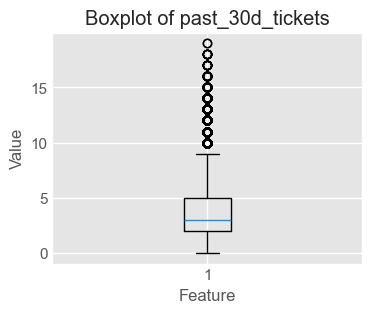

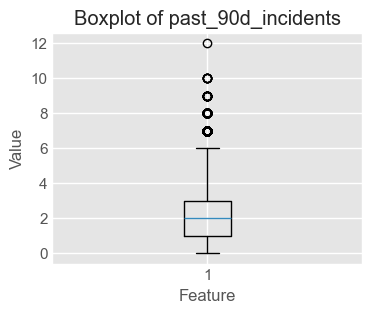

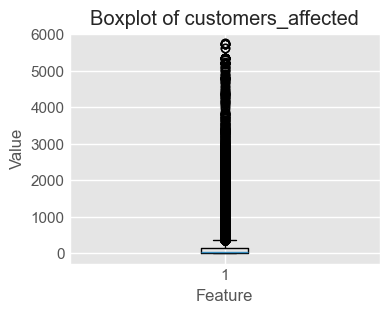

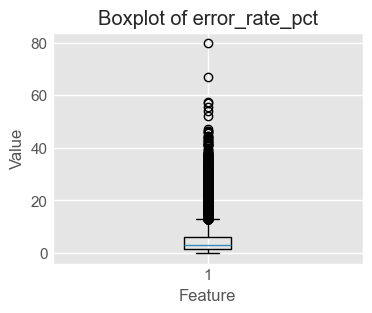

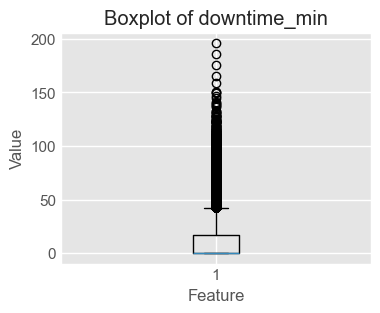

In [31]:
for variable in numeric_cols:
    plt.figure(figsize = (4,3))  
    plt.boxplot(data[variable]) 
    plt.title(f'Boxplot of {variable}') 
    plt.xlabel('Feature') 
    plt.ylabel('Value')  
    plt.show()

In [32]:
valid_cols = ['ticket_id', 'day_of_week_num', 'company_size_cat','industry_cat', 'customer_tier_cat', 'past_30d_tickets', 
'past_90d_incidents', 'product_area_cat', 'customers_affected', 'error_rate_pct', 'downtime_min', 'payment_impact_flag', 
'security_incident_flag', 'data_loss_flag', 'priority_cat']

filtered_data = data[valid_cols]

In [33]:
filtered_data.to_csv('Data/Processed/processed_data.csv')